# I Импортируем библиотеки

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #для ящика с усами
import tensorflow as tf

from sklearn.preprocessing import Normalizer #импортируем метод для процедуры нормализации 
from sklearn.preprocessing import MinMaxScaler #импортируем метод для процедуры нормализации
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Dropout  # Подключаем класс Dense - полносвязный слой
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow import keras
from tensorflow.keras import layers

# !pip install xlrd
# !pip install openpyxl
# !pip install catboost
# !pip install lightgbm
# !pip install flask


# II Загружаем данные, формируем датасет, исследуем исходные данные

In [7]:
x_bp=pd.read_excel('./Бурчакова А.А. Композиты ВКР/X_bp.xlsx', index_col=0)
x_nup = pd.read_excel('./Бурчакова А.А. Композиты ВКР/X_nup.xlsx', index_col=0)

## 2.1 Исследуем датасет x_bp

2.1.1
Выводим первые пять строк таблицы x_bp (далее - датасет x_bp). 
Видим, что перед нами датасет с данными по 10 свойствам композиционных материалов. 

In [8]:
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


2.1.2
Выводим информацию по датасету x_bp.
Узнаем, что: 
- класс таблицы - DataFrame; 
- в таблице 1023 строки и 10 столбцов;
- в таблице нет пропущенных значений;
- тип данных - float64.

In [9]:
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


2.1.3
Получаем статистическое описание датасета x_bp.
Узнаем, что: 
- во всех столбцах количество значений соответствует длине столбцов и составляет 1023; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения квартилей, минимальные и максимальные значения.

In [10]:
x_bp.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


## 2.2 Исследуем датасет x_nup

2.2.1
Выводим первые пять строк таблицы x_nup (далее - датасет x_ nup).

Видим, что перед нами датасет с данными о трех свойствах композиционных материалов. 

In [11]:
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


2.2.2 
Выводим информацию по датасету x_nup.
Узнаем, что: 
- класс таблицы - DataFrame; 
- в таблице 1040 строк и 3 столбца;
- в таблице нет пропущенных значений;
- в таблице 2 типа данных - int64, float64.

In [12]:
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


2.2.3 
Смотрим, какие уникальные значения есть в столбце 'Угол нашивки, град', который содержит данные типа int64 

In [13]:
x_nup.iloc[:,0].unique()

array([ 0, 90], dtype=int64)

2.2.4
Получаем описание датасета x_ nup  с использованием статистических параметров.
Узнаем, что: 
- во всех столбцах количество значений соответствует длине столбцов и составляет 1040; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квартилей, минимальные и максимальные значения данных по столбцам датасета.

In [14]:
x_nup.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1040.00000,1040.000000,1040.000000
mean,45.00000,6.911385,57.248399
std,45.02165,2.555181,12.332438
min,0.00000,0.000000,0.000000
25%,0.00000,5.102256,49.970740
50%,45.00000,6.938000,57.413594
75%,90.00000,8.587662,65.107235
max,90.00000,14.440522,103.988901


2.2.4 
Вычислим разницу между длиной столбцов в датасетах.
Посчитаем сколько составит эта величина от длины всех столбцов таблицы №2.
Видим, что эта величина составляет 1,6%.
Принимается решение о том, что 1,6% это достаточно маленькая величина, следовательно объединение таблиц будет происходить с удалением 17 "избыточных" строк в датасете x_nup.

In [15]:
(len(x_nup)-len(x_bp))/len(x_nup)*100

1.6346153846153848

## 2.3 Объединение данных в новом датасете 

2.3.1
Создадим новый датасет raw_dataset с помощью метода inner join, объединяющего наши датасеты построчно.

In [24]:
joinned_dataset=pd.concat([x_bp,x_nup],axis=1, join='inner')

Ниже создается датасет, для которого вычислен наибольший R2.
Модели создавались для следующих датасетов:
- датасет, в котором выбросы убраны по 10%-ым нижним и верхним квартилям (лучший R2);
- датасет, в котором выбросы убраны вручную для трех признаков (лучший R2);
- датасет, в котором убраны все первые 40 строк исходного датасета (лучший R2);
- датасет, в котором убраны все первые 40 строк исходного датасета, а также вручную убраны выбросы для трех признаков  (лучший R2).

In [25]:
raw_dataset = joinned_dataset.iloc[40:,:]

In [26]:
raw_dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
40,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0,7.856167,64.301964
41,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0,7.401543,19.250533
42,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0,6.675780,78.623299
43,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0,7.526398,38.176975
44,2.914333,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,69.814615,2262.784366,303.075452,0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


### 2.3.3
Выводим информацию по raw_dataset.
Узнаем, что: 
- класс датасета - DataFrame; 
- в датасете 983 строки и 13 столбцов;
- отсутствуют пропущенные значения;
- в таблице 2 типа данных - int64, float64.

In [179]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 40 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       983 non-null    float64
 1   Плотность, кг/м3                      983 non-null    float64
 2   модуль упругости, ГПа                 983 non-null    float64
 3   Количество отвердителя, м.%           983 non-null    float64
 4   Содержание эпоксидных групп,%_2       983 non-null    float64
 5   Температура вспышки, С_2              983 non-null    float64
 6   Поверхностная плотность, г/м2         983 non-null    float64
 7   Модуль упругости при растяжении, ГПа  983 non-null    float64
 8   Прочность при растяжении, МПа         983 non-null    float64
 9   Потребление смолы, г/м2               983 non-null    float64
 10  Угол нашивки, град                    983 non-null    int64  
 11  Шаг нашивки      

получаем описание датасета raw_dataset с использованием статистических параметров. Узнаем, что:

во всех столбцах количество значений соответствует длине столбцов и составляет 983;
средние значения между столбцами несопоставимы;
видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квартилей, минимальные и максимальные значения данных по столбцам датасета.

In [180]:
raw_dataset.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,2.934399,1975.975965,737.744541,110.492719,22.229921,285.664381,482.194609,73.322878,2464.779116,218.681742,44.221770,6.899190,57.146968
std,0.915942,73.764303,329.630145,28.301270,2.411140,40.963392,281.687097,3.119536,484.963349,59.943101,45.016173,2.566495,12.358217
min,0.389403,1731.764635,2.436909,17.740275,14.254985,160.255843,0.603740,64.054061,1036.856605,33.803026,0.000000,0.037639,11.740126
25%,2.319244,1925.400035,497.868982,92.112353,20.553656,258.402421,267.144172,71.287231,2136.596566,179.627520,0.000000,5.124226,49.799212
50%,2.913953,1977.661795,738.957167,110.099044,22.208465,285.407901,451.309770,73.241464,2456.395009,217.481262,0.000000,6.893973,57.341920
75%,3.562274,2021.277591,962.207163,129.884490,23.981267,313.061676,694.336817,75.356612,2759.083778,257.632055,90.000000,8.562934,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,28.955094,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


# III Предобработка данных

## 3.1 Удаление выбросов

In [181]:
dataset= raw_dataset.copy()

3.1.1 
Построим "ящик с усами".
Видим, что выбросы есть у всех параметров, кроме угла нашивки.

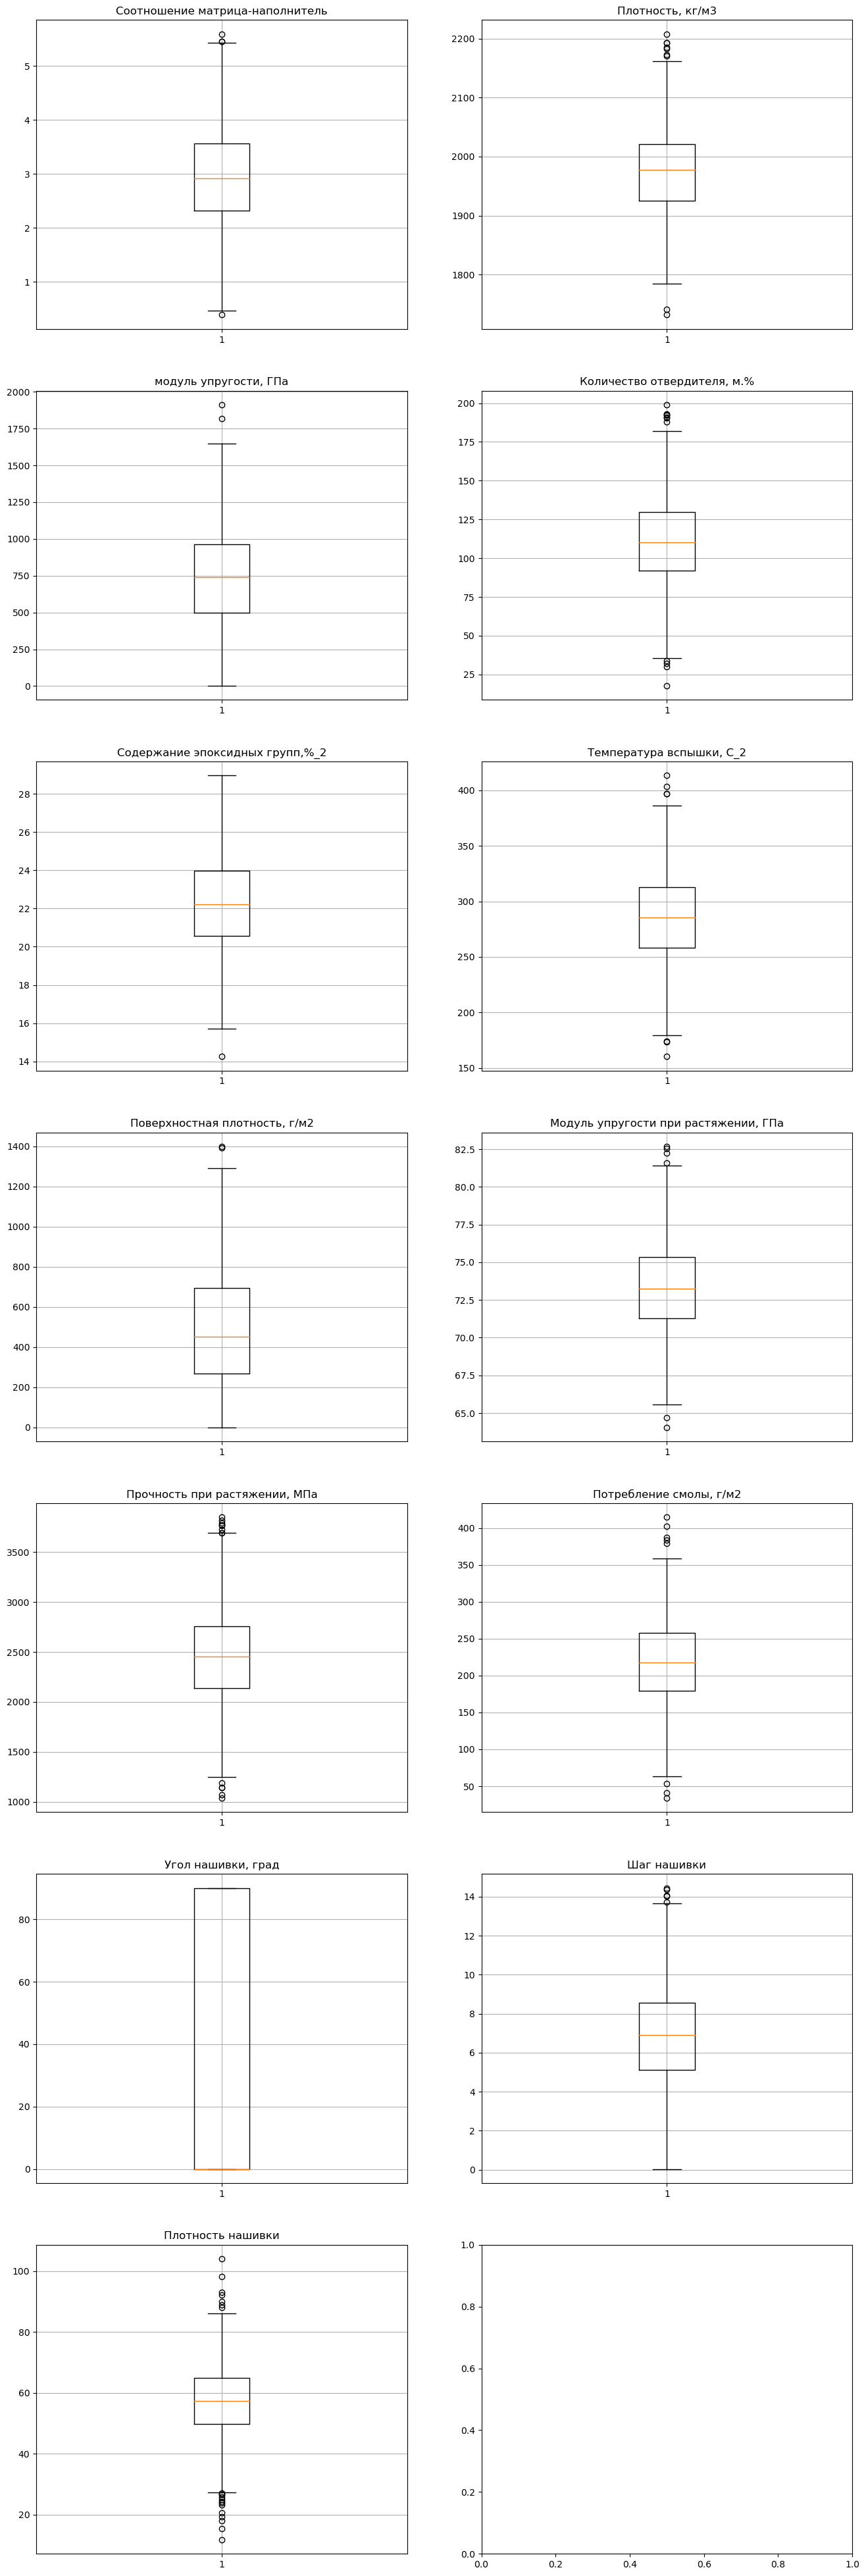

In [182]:
n=7 #кол-во граф по y
m= 2 # кол-во графиков по x


fig, axs = plt.subplots(7,2, figsize=(16,50))
counter=0

for i in range(n):
    for j in range(m):
        if counter != dataset.shape[1]:
            #print(i,j,counter)
            axs[i,j].boxplot(dataset.iloc[:,counter])
            axs[i,j].set_title(dataset.columns[counter])
            axs[i,j].grid()
            
            counter+=1

3.1.2 Построим гистограммы распределения всех признаков датасета raw_dataset
Угол нашивки принимает два значения: 0 и 90 градусов. 
Распределение остальных признаков имеет колоколообразный вид, что свидетельствует о нормальном распределении данных.
Признак «поверхностная плотность, г/м2» имеет смещенное влево распределение,
что свидельствует о несимметричности распределения.

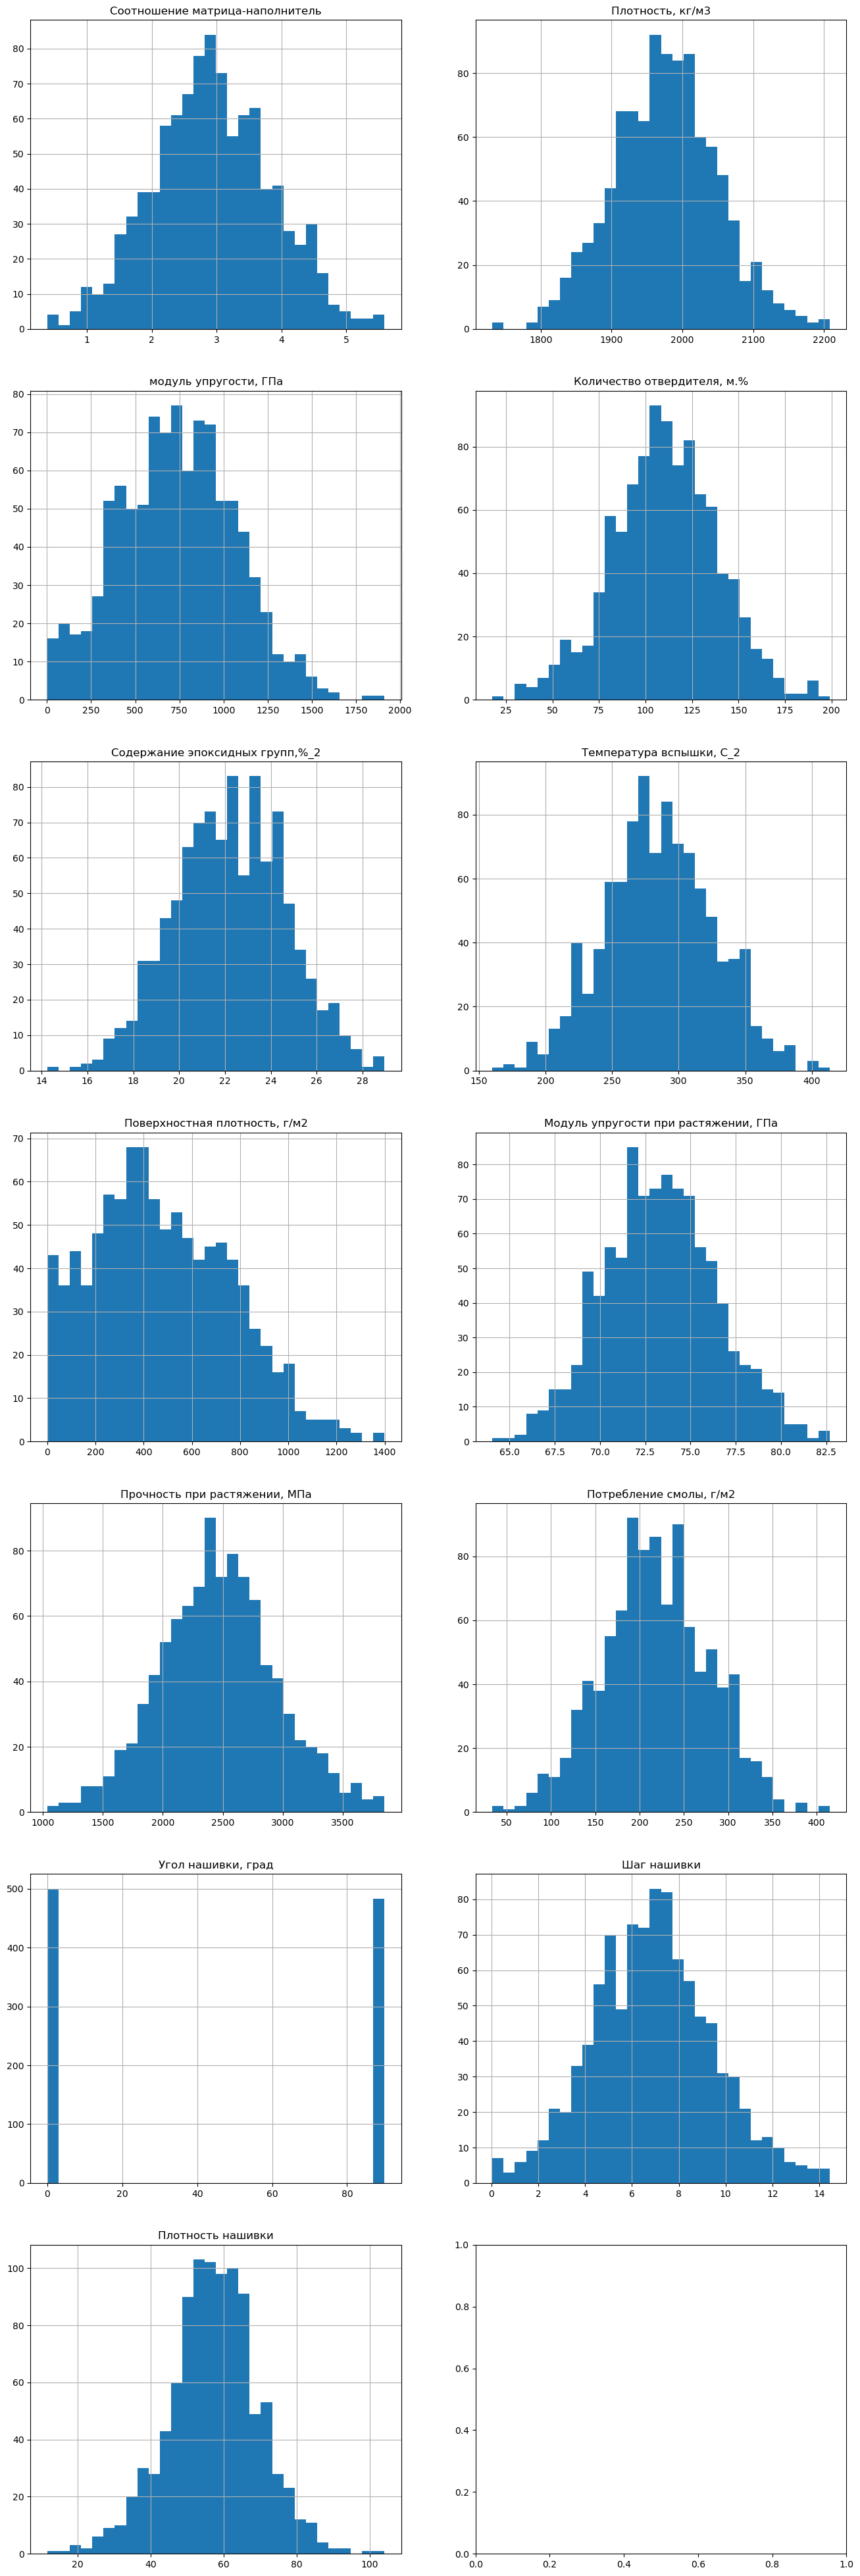

In [32]:
n=7 #кол-во граф по y
m= 2 # кол-во графиков по x


fig, axs = plt.subplots(7,2, figsize=(16,50))
counter=0

for i in range(n):
    for j in range(m):
        if counter != dataset.shape[1]:
            #print(i,j,counter)
            axs[i,j].hist(dataset.iloc[:,counter], bins=30)
            axs[i,j].set_title(dataset.columns[counter])
            axs[i,j].grid()
            
            counter+=1

3.1.3 
Выведем таблицу с пороговыми значениями 10%-х квантилей для каждой переменной таблицы

In [33]:
bins = dataset.quantile([0, 0.1, 0.2,
                                      0.3, 0.4, 0.5,
                                     0.6, 0.7, 0.8,
                                      0.9, 1])
bins

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.389403,1731.764635,2.436909,17.740275,14.254985,160.255843,0.603740,64.054061,1036.856605,33.803026,0.0,0.037639,11.740126
0.1,1.742788,1881.954441,320.715523,76.158816,19.107423,232.706965,111.811421,69.339305,1863.950132,140.847110,0.0,3.683044,41.232752
0.2,2.156555,1913.441781,439.565835,87.120047,20.155324,250.739079,221.959985,70.624072,2061.513200,170.399429,0.0,4.754569,47.753483
0.3,2.451961,1936.842307,562.850089,96.533513,20.915108,264.656096,311.101122,71.702479,2202.918104,188.082049,0.0,5.518629,51.238971
0.4,2.695621,1960.298261,652.008616,104.013325,21.558171,274.713384,377.925903,72.454704,2349.852349,201.865209,0.0,6.256230,54.490671
0.5,2.913953,1977.661795,738.957167,110.099044,22.208465,285.407901,451.309770,73.241464,2456.395009,217.481262,0.0,6.893973,57.341920
0.6,3.125733,1993.815802,833.446547,117.867071,22.975117,295.152658,540.284204,74.067026,2576.520228,234.209837,90.0,7.456439,60.338019
0.7,3.403429,2012.960894,919.246987,125.230718,23.567924,306.117005,638.923820,74.862195,2701.356983,248.590116,90.0,8.107221,63.490281
0.8,3.701405,2036.372250,1023.788624,134.466667,24.305401,320.508820,734.323067,75.961058,2840.372831,271.644075,90.0,8.985083,66.813013
0.9,4.148234,2067.142047,1152.970108,146.310994,25.276607,341.115403,862.137568,77.253073,3090.245374,299.180484,90.0,10.231939,72.283352


3.1.4
Создадим копию таблицы удаления выбросов

In [34]:
dataset_filtered = dataset.copy()

3.1.5
График boxplot показал выбросы, теперь удалим их последовательно для трех столбцов:

Температура вспышки, С_2

Содержание эпоксидных групп,%_2

Плотность нашивки

In [35]:
dataset_filtered.drop(index=dataset_filtered[dataset_filtered['Температура вспышки, С_2']>390].index, inplace=True)
dataset_filtered.drop(index=dataset_filtered[dataset_filtered['Температура вспышки, С_2']<170].index, inplace=True)

In [36]:
dataset_filtered.drop(index=dataset_filtered[dataset_filtered['Содержание эпоксидных групп,%_2']>30].index,
                      inplace=True)
dataset_filtered.drop(index=dataset_filtered[dataset_filtered['Содержание эпоксидных групп,%_2']<16].index,
                      inplace=True)

In [37]:
dataset_filtered.drop(index=dataset_filtered[dataset_filtered['Плотность нашивки']>95].index, inplace=True)
dataset_filtered.drop(index=dataset_filtered[dataset_filtered['Плотность нашивки']<15].index, inplace=True)

3.1.6
Выводим информацию по таблице с удаленными выбросами dataset_filtered.
Видим, что: 
- класс таблицы - DataFrame; 
- в таблице 972 строки и 13 столбцов

In [183]:
dataset_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 40 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       972 non-null    float64
 1   Плотность, кг/м3                      972 non-null    float64
 2   модуль упругости, ГПа                 972 non-null    float64
 3   Количество отвердителя, м.%           972 non-null    float64
 4   Содержание эпоксидных групп,%_2       972 non-null    float64
 5   Температура вспышки, С_2              972 non-null    float64
 6   Поверхностная плотность, г/м2         972 non-null    float64
 7   Модуль упругости при растяжении, ГПа  972 non-null    float64
 8   Прочность при растяжении, МПа         972 non-null    float64
 9   Потребление смолы, г/м2               972 non-null    float64
 10  Угол нашивки, град                    972 non-null    int64  
 11  Шаг нашивки      

In [39]:
dataset_filtered.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,2.943041,1975.500777,738.374270,110.488845,22.244580,285.177399,480.550407,73.323252,2464.874731,219.011879,44.351852,6.916326,57.144424
std,0.908521,73.634541,329.623335,28.294866,2.387533,40.151149,281.279921,3.122066,485.269329,59.878051,45.018496,2.571138,12.124588
min,0.389403,1731.764635,2.436909,17.740275,16.048978,173.484920,0.603740,64.054061,1036.856605,33.803026,0.000000,0.037639,15.416076
25%,2.334609,1924.699926,498.438068,92.170589,20.553984,258.353239,266.205564,71.301753,2135.886086,179.908444,0.000000,5.139108,49.892983
50%,2.919089,1977.603973,738.275026,110.162666,22.214281,285.196764,450.413988,73.230375,2455.297778,218.250769,0.000000,6.909686,57.362576
75%,3.563873,2020.985806,962.171563,129.853101,23.984243,312.837916,692.795552,75.337585,2758.749272,258.808112,90.000000,8.582979,64.930896
max,5.591742,2207.773481,1911.536477,198.953207,28.955094,386.067992,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,92.963492


Посмотрим на датасет: делаем вывод, что нужно поработать с индексом.

In [187]:
dataset_filtered

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
40,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0,7.856167,64.301964
41,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0,7.401543,19.250533
42,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0,6.675780,78.623299
43,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0,7.526398,38.176975
44,2.914333,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,69.814615,2262.784366,303.075452,0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


с помощью метода reset_index() зададим нумерацию индкса с 0.

In [188]:
dataset_index=dataset_filtered.reset_index(drop=True)

метод reset_index() отработал, нумерация индекса с 0

In [186]:
dataset_index

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0,7.856167,64.301964
1,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0,7.401543,19.250533
2,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0,6.675780,78.623299
3,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0,7.526398,38.176975
4,2.914333,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,69.814615,2262.784366,303.075452,0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
968,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
969,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
970,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


3.1.7 Получаем описание таблицы dataset_filtered с использованием статистических параметров.
Узнаем, что: 
- во всех столбцах количество значений соответствует 972; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квартилей, минимальные и максимальные значения данных по столбцам датасета.

In [189]:
dataset_index.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,2.943041,1975.500777,738.374270,110.488845,22.244580,285.177399,480.550407,73.323252,2464.874731,219.011879,44.351852,6.916326,57.144424
std,0.908521,73.634541,329.623335,28.294866,2.387533,40.151149,281.279921,3.122066,485.269329,59.878051,45.018496,2.571138,12.124588
min,0.389403,1731.764635,2.436909,17.740275,16.048978,173.484920,0.603740,64.054061,1036.856605,33.803026,0.000000,0.037639,15.416076
25%,2.334609,1924.699926,498.438068,92.170589,20.553984,258.353239,266.205564,71.301753,2135.886086,179.908444,0.000000,5.139108,49.892983
50%,2.919089,1977.603973,738.275026,110.162666,22.214281,285.196764,450.413988,73.230375,2455.297778,218.250769,0.000000,6.909686,57.362576
75%,3.563873,2020.985806,962.171563,129.853101,23.984243,312.837916,692.795552,75.337585,2758.749272,258.808112,90.000000,8.582979,64.930896
max,5.591742,2207.773481,1911.536477,198.953207,28.955094,386.067992,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,92.963492


построим таблицу корреляции свойств композитов.

In [190]:
dataset_index.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.012504,0.033837,-0.011569,0.022723,-0.001518,-0.006660,-0.017027,0.043168,0.070107,-0.031787,0.026023,0.006540
"Плотность, кг/м3",0.012504,1.000000,-0.020579,-0.036536,0.000287,-0.026057,0.037962,-0.023052,-0.070019,-0.022383,-0.055399,-0.051769,0.086661
"модуль упругости, ГПа",0.033837,-0.020579,1.000000,0.014408,-0.005311,0.034906,-0.022429,0.009834,0.053468,-0.002710,-0.026203,-0.015726,0.062476
"Количество отвердителя, м.%",-0.011569,-0.036536,0.014408,1.000000,0.008707,0.072471,0.053243,-0.085966,-0.063440,0.002846,0.037727,0.006868,0.012412
"Содержание эпоксидных групп,%_2",0.022723,0.000287,-0.005311,0.008707,1.000000,-0.011374,-0.002807,0.062689,-0.029830,0.006932,-0.003131,0.005082,-0.041882
"Температура вспышки, С_2",-0.001518,-0.026057,0.034906,0.072471,-0.011374,1.000000,0.014127,0.025610,-0.027173,0.060634,0.005454,0.026560,0.000282
"Поверхностная плотность, г/м2",-0.006660,0.037962,-0.022429,0.053243,-0.002807,0.014127,1.000000,0.008466,0.003459,0.002732,0.052058,0.045573,-0.035738
"Модуль упругости при растяжении, ГПа",-0.017027,-0.023052,0.009834,-0.085966,0.062689,0.025610,0.008466,1.000000,0.008351,0.050359,0.017270,-0.024539,0.028492
"Прочность при растяжении, МПа",0.043168,-0.070019,0.053468,-0.063440,-0.029830,-0.027173,0.003459,0.008351,1.000000,0.026185,0.018841,-0.054940,0.022197
"Потребление смолы, г/м2",0.070107,-0.022383,-0.002710,0.002846,0.006932,0.060634,0.002732,0.050359,0.026185,1.000000,-0.019971,0.018166,0.018590


In [44]:
dataset_index.corr().to_excel('output.xlsx')

построим тепловую карту корреляции признаков. Явных зависимостей не выявлено

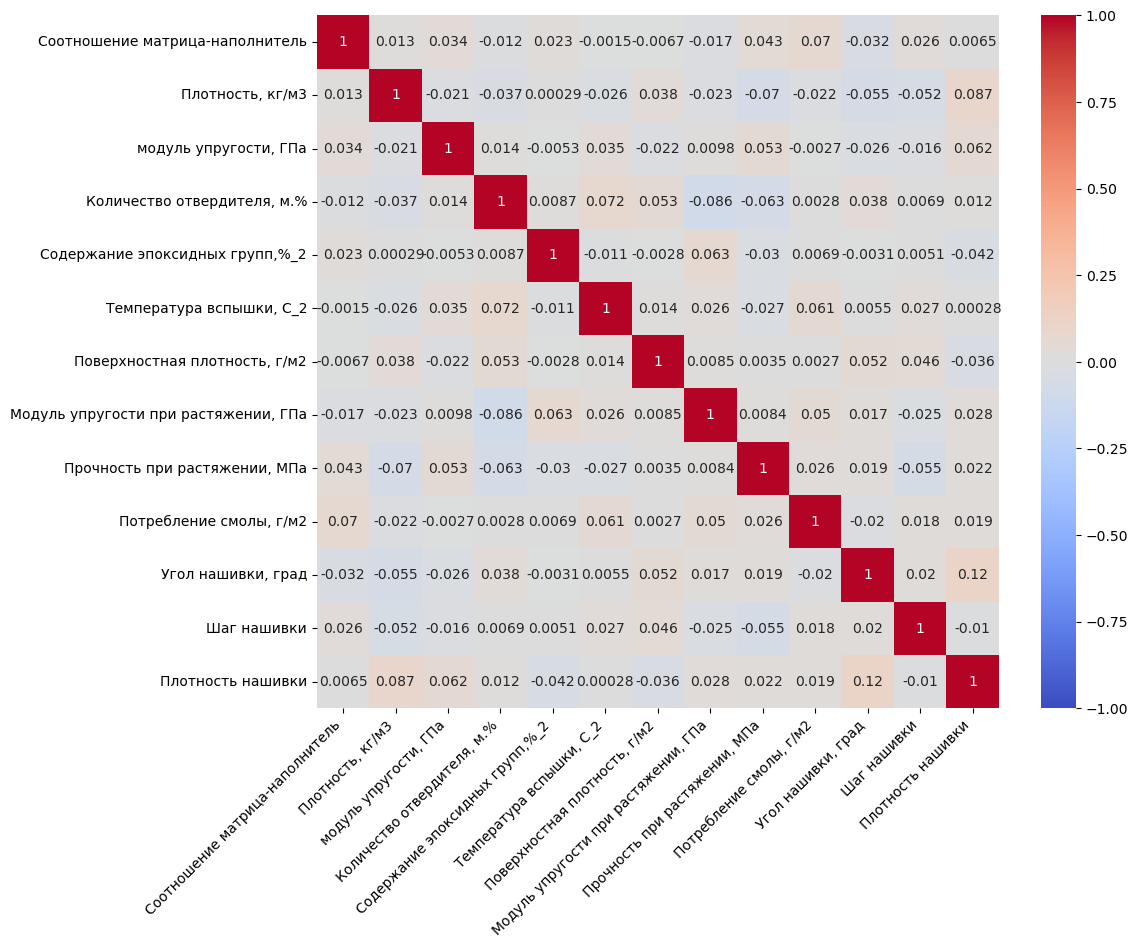

In [191]:
f,ax = plt.subplots(figsize=(11,9))
sns.heatmap(dataset_index.corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right');

## 3.2 Нормализация

3.2.1
Созададим таблицу для нормализации, из которой исключим целевые переменные нашего исследования:
- Модуль упругости при растяжении, ГПа;
- Прочность при растяжении, МПа.

In [192]:
df_drop_target = dataset_index.drop(columns=['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'])

In [193]:
df_drop_target

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,311.052398,0,7.856167,64.301964
1,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,227.022557,0,7.401543,19.250533
2,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,314.776669,0,6.675780,78.623299
3,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,91.047646,0,7.526398,38.176975
4,2.914333,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,303.075452,0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...
967,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,125.007669,90,9.076380,47.019770
968,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,117.730099,90,10.565614,53.750790
969,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,236.606764,90,4.161154,67.629684
970,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,197.126067,90,6.313201,58.261074


3.2.2
Выведем столбцы новой таблицы.
Видим, что целевые столбцы удалены.

In [194]:
df_drop_target.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Проведем нормализацию нового датафрейма без целевых признаков

In [49]:
dataset_transformed = Normalizer().fit_transform(df_drop_target)

In [196]:
dataset_transformed

array([[0.00140055, 0.90852884, 0.21041032, ..., 0.        , 0.00362607,
        0.029679  ],
       [0.00110103, 0.86471998, 0.47188917, ..., 0.        , 0.00330575,
        0.00859787],
       [0.00126693, 0.94918372, 0.24966761, ..., 0.        , 0.00317437,
        0.03738577],
       ...,
       [0.00150445, 0.90450995, 0.19115695, ..., 0.04127308, 0.00190826,
        0.03101428],
       [0.00159753, 0.89108106, 0.31968011, ..., 0.03880264, 0.00272188,
        0.02511871],
       [0.0017984 , 0.8927771 , 0.19708407, ..., 0.0425039 , 0.00287086,
        0.03656963]])

In [197]:
normalized_dataset=pd.DataFrame(dataset_transformed, columns=df_drop_target.columns)

In [52]:
normalized_dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.001401,0.908529,0.210410,0.028349,0.010842,0.146043,0.294186,0.143568,0.000000,0.003626,0.029679
1,0.001101,0.864720,0.471889,0.031842,0.010953,0.121473,0.057650,0.101395,0.000000,0.003306,0.008598
2,0.001267,0.949184,0.249668,0.036855,0.008619,0.106232,0.013627,0.149678,0.000000,0.003174,0.037386
3,0.000509,0.837914,0.383427,0.043883,0.008340,0.096244,0.371274,0.038806,0.000000,0.003208,0.016272
4,0.001328,0.933730,0.174166,0.037065,0.007468,0.106294,0.256053,0.138086,0.000000,0.003793,0.020979
...,...,...,...,...,...,...,...,...,...,...,...
967,0.001034,0.888489,0.415484,0.039594,0.009159,0.147821,0.095216,0.056897,0.040963,0.004131,0.021401
968,0.001600,0.952253,0.206575,0.067808,0.009104,0.118081,0.162880,0.054685,0.041804,0.004908,0.024967
969,0.001504,0.904510,0.191157,0.050690,0.010987,0.113924,0.339422,0.108505,0.041273,0.001908,0.031014
970,0.001598,0.891081,0.319680,0.060962,0.008298,0.118900,0.276563,0.084989,0.038803,0.002722,0.025119


In [53]:
normalized_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  972 non-null    float64
 1   Плотность, кг/м3                 972 non-null    float64
 2   модуль упругости, ГПа            972 non-null    float64
 3   Количество отвердителя, м.%      972 non-null    float64
 4   Содержание эпоксидных групп,%_2  972 non-null    float64
 5   Температура вспышки, С_2         972 non-null    float64
 6   Поверхностная плотность, г/м2    972 non-null    float64
 7   Потребление смолы, г/м2          972 non-null    float64
 8   Угол нашивки, град               972 non-null    float64
 9   Шаг нашивки                      972 non-null    float64
 10  Плотность нашивки                972 non-null    float64
dtypes: float64(11)
memory usage: 83.7 KB


In [54]:
normalized_dataset.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,0.001321,0.885707,0.324611,0.049577,0.009985,0.127922,0.212009,0.098260,0.019934,0.003104,0.025627
std,0.000417,0.050680,0.131301,0.013071,0.001257,0.019353,0.118475,0.027554,0.020321,0.001172,0.005591
min,0.000188,0.694942,0.001118,0.007870,0.006308,0.074918,0.000300,0.014654,0.000000,0.000016,0.007325
25%,0.001035,0.852684,0.233776,0.041174,0.009129,0.114640,0.121750,0.080291,0.000000,0.002328,0.022042
50%,0.001305,0.889041,0.332027,0.049335,0.009943,0.127592,0.203323,0.096993,0.000000,0.003099,0.025599
75%,0.001602,0.925325,0.420824,0.058643,0.010881,0.140919,0.302324,0.116736,0.040574,0.003824,0.029466
max,0.002538,0.984962,0.681573,0.093484,0.014225,0.188308,0.559879,0.196824,0.048575,0.007387,0.044328


Оценим корреляцию нормализованных признаков с целевыми:Прочность при растяжении, МПа; Модуль упругости при растяжении
Используем метод concat, для объединения датасетов

In [55]:
pd.concat([normalized_dataset, dataset_index[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]], axis=1, join='inner').corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа"
Соотношение матрица-наполнитель,1.000000,0.154242,-0.086302,0.032844,0.117866,0.060777,-0.087836,0.100521,-0.021827,0.055469,0.042091,0.041394,-0.018400
"Плотность, кг/м3",0.154242,1.000000,-0.772152,0.153156,0.420748,0.261282,-0.414542,0.139626,0.041445,0.109053,0.222561,-0.057040,-0.015549
"модуль упругости, ГПа",-0.086302,-0.772152,1.000000,-0.137319,-0.321927,-0.242962,-0.159170,-0.141875,-0.070616,-0.124878,-0.126988,0.058789,0.008938
"Количество отвердителя, м.%",0.032844,0.153156,-0.137319,1.000000,0.125465,0.148871,-0.042929,0.054991,0.055176,0.042987,0.059366,-0.056886,-0.085314
"Содержание эпоксидных групп,%_2",0.117866,0.420748,-0.321927,0.125465,1.000000,0.174496,-0.185927,0.109378,0.039154,0.094207,0.080455,-0.028804,0.052202
"Температура вспышки, С_2",0.060777,0.261282,-0.242962,0.148871,0.174496,1.000000,-0.143509,0.128370,0.046674,0.084781,0.079546,-0.030732,0.023751
"Поверхностная плотность, г/м2",-0.087836,-0.414542,-0.159170,-0.042929,-0.185927,-0.143509,1.000000,-0.084057,0.033893,-0.013665,-0.150932,0.005506,0.007993
"Потребление смолы, г/м2",0.100521,0.139626,-0.141875,0.054991,0.109378,0.128370,-0.084057,1.000000,-0.003423,0.047886,0.059526,0.020920,0.050303
"Угол нашивки, град",-0.021827,0.041445,-0.070616,0.055176,0.039154,0.046674,0.033893,-0.003423,1.000000,0.037344,0.144131,0.013054,0.013702
Шаг нашивки,0.055469,0.109053,-0.124878,0.042987,0.094207,0.084781,-0.013665,0.047886,0.037344,1.000000,0.032763,-0.057244,-0.024405


Построим тепловую карту корреляциии. Зависимости целевых переменных с прихнаками (фичами) нет.

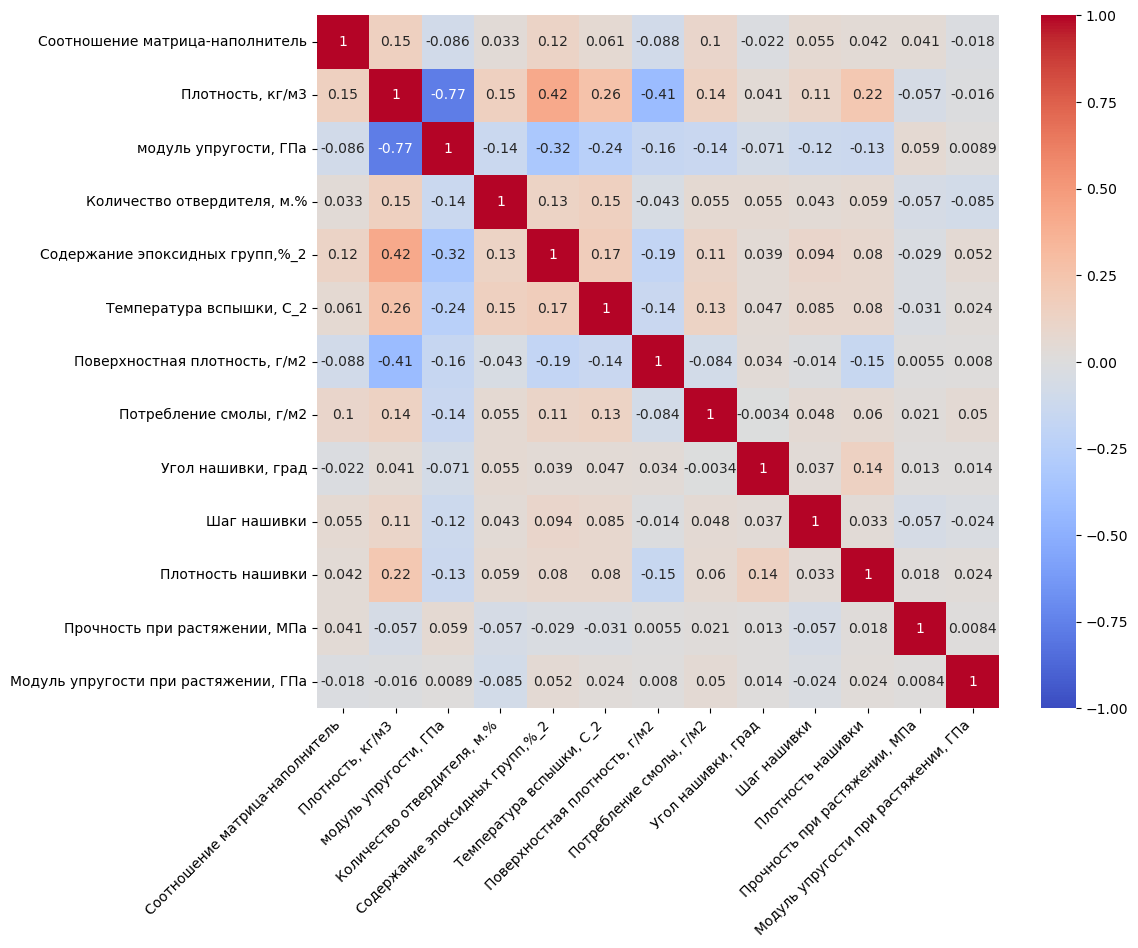

In [56]:
f,ax = plt.subplots(figsize=(11,9))
sns.heatmap(pd.concat([normalized_dataset,
                       dataset_index[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]],
                      axis=1, join='inner').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right');

# IV Обучение модели

Обучить алгоритм машинного обучения, который будет определять значения:
-	Модуль упругости при растяжении, ГПа
-	Прочность при растяжении, МПа

## 4.1 Отбор и выделение признаков 

4.1.1
Создадим df (копию normalized_dataset) для операции по отбору и выделению признаков

In [57]:
df =  normalized_dataset.copy()

4.1.2 
поместим целевые переменные 'Модуль упругости при растяжении, ГПа' и  'Прочность при растяжении, МПа' в переменные y_upr и y_prochn

In [58]:
y_upr = dataset_index[['Модуль упругости при растяжении, ГПа']]
y_prochn = dataset_index[['Прочность при растяжении, МПа']]

In [59]:
y_upr

,"Модуль упругости при растяжении, ГПа"
0,75.090372
1,66.420794
2,69.489773
3,73.454695
4,69.814615
...,...
967,73.090961
968,72.920827
969,74.734344
970,74.042708


4.1.3
отберем все признаки и поместим их в переменные x_upr и x_prochn

In [60]:
x_upr = df.copy()
x_prochn = df.copy()

In [61]:
x_upr

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.001401,0.908529,0.210410,0.028349,0.010842,0.146043,0.294186,0.143568,0.000000,0.003626,0.029679
1,0.001101,0.864720,0.471889,0.031842,0.010953,0.121473,0.057650,0.101395,0.000000,0.003306,0.008598
2,0.001267,0.949184,0.249668,0.036855,0.008619,0.106232,0.013627,0.149678,0.000000,0.003174,0.037386
3,0.000509,0.837914,0.383427,0.043883,0.008340,0.096244,0.371274,0.038806,0.000000,0.003208,0.016272
4,0.001328,0.933730,0.174166,0.037065,0.007468,0.106294,0.256053,0.138086,0.000000,0.003793,0.020979
...,...,...,...,...,...,...,...,...,...,...,...
967,0.001034,0.888489,0.415484,0.039594,0.009159,0.147821,0.095216,0.056897,0.040963,0.004131,0.021401
968,0.001600,0.952253,0.206575,0.067808,0.009104,0.118081,0.162880,0.054685,0.041804,0.004908,0.024967
969,0.001504,0.904510,0.191157,0.050690,0.010987,0.113924,0.339422,0.108505,0.041273,0.001908,0.031014
970,0.001598,0.891081,0.319680,0.060962,0.008298,0.118900,0.276563,0.084989,0.038803,0.002722,0.025119


4.1.4 
разобьем данные на обучающую (X_train_upr,y_train_upr,X_train_prochn,y_train_prochn)
и тестовую (X_test_upr,y_test_upr,X_test_prochn, y_test_prochn) выборки
Размер тестовой выборки определим 10%, random_state определим 42.

In [62]:
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.1, random_state=42)

X_train_prochn, X_test_prochn, y_train_prochn, y_test_prochn = train_test_split(x_prochn,
                                                                                y_prochn, 
                                                                                test_size=0.1,
                                                                                random_state=42)

4.1.5
посмотрим на новую размерность обучающей и тестовой выборки для признака Модуль упругости при растяжении, ГПа

In [63]:
X_train_upr.shape, y_train_upr.shape, X_test_upr.shape, y_test_upr.shape

((874, 11), (874, 1), (98, 11), (98, 1))

4.1.5
посмотрим на новую размерность обучающей и тестовой выборки для признака Прочность при растяжении, МПа

In [64]:
X_train_prochn.shape, y_train_prochn.shape, X_test_prochn.shape, y_test_prochn.shape

((874, 11), (874, 1), (98, 11), (98, 1))

## 4.2 Регрессионные модели МО 

### 4.2.1 LinearRegression

In [65]:
model_LR_upr = LinearRegression()
model_LR_prochn = LinearRegression()

обучим модель model_LR

In [66]:
model_LR_upr.fit(X_train_upr, y_train_upr)
model_LR_prochn.fit(X_train_prochn, y_train_prochn)

LinearRegression()

на основе всех независимых переменных x предскажем y upr

In [67]:
model_LR_upr.predict(X_test_upr)

array([[73.68454204],
       [74.09910685],
       [73.37414313],
       [73.62400254],
       [73.44009535],
       [73.2911042 ],
       [73.31607277],
       [73.00658601],
       [73.11046998],
       [73.40533672],
       [73.13988848],
       [73.43644039],
       [72.8473683 ],
       [73.52434056],
       [73.45263426],
       [74.34092386],
       [73.41319232],
       [72.64054871],
       [73.51298503],
       [73.91459682],
       [73.40503175],
       [72.63048373],
       [73.72514502],
       [72.8571318 ],
       [72.75753273],
       [73.4564873 ],
       [73.61320804],
       [72.70688121],
       [73.73787073],
       [73.81672656],
       [73.08775641],
       [73.15150865],
       [73.3064773 ],
       [73.10948058],
       [73.91930142],
       [72.98300458],
       [73.79013606],
       [72.51082219],
       [73.08536888],
       [73.196929  ],
       [72.72296662],
       [72.99142529],
       [73.02636091],
       [73.01800102],
       [72.90137462],
       [73

рассчитаем среднюю квадратическую ошибку, сравним тестовые и прогнозные значения целевых признаков

In [68]:
print('MSE_LR_upr:', np.round(mean_squared_error(y_test_upr, model_LR_upr.predict(X_test_upr)), 2))
print('MSE_LR_prochn', np.round(mean_squared_error(y_test_prochn, model_LR_prochn.predict(X_test_prochn)),2))

MSE_LR_upr: 9.59
MSE_LR_prochn 291277.1


Выведем корень среднеквадратической ошибки RMSE_LR

In [69]:
print('RMSE_LR_upr:', np.round(mean_squared_error(y_test_upr, model_LR_upr.predict(X_test_upr), squared=False),2))
print('RMSE_LR_prochn:', np.round(mean_squared_error(y_test_prochn, model_LR_prochn.predict(X_test_prochn), squared=False),2))

RMSE_LR_upr: 3.1
RMSE_LR_prochn: 539.7


Выведем значение коэффицианта детерминации R2, показывающего качество модели.
Значение равно 1% - чрезвычайно низкое значение.

In [70]:
print('R2_upr:', np.round(metrics.r2_score(y_test_upr, model_LR_upr.predict(X_test_upr)), 2))
print('R2_prochn:', np.round(metrics.r2_score(y_test_prochn, model_LR_prochn.predict(X_test_prochn)), 2))

R2_upr: 0.02
R2_prochn: -0.04


### 4.2.2 model_Lasso

Обратимся к модели Лассо, попробуем улучишь метрики, полученные линейной регрессией.
Перебираем значения гиперпараметра alpha
Остановимся на alpha=0.2

In [71]:
model_Lasso_upr = linear_model.Lasso(alpha=0.2)
model_Lasso_upr.fit(X_train_upr, y_train_upr)

Lasso(alpha=0.2)

In [72]:
predict_Lasso_upr = model_Lasso_upr.predict(X_test_upr)

Выведем метрики

In [198]:
print('RMSE_Lasso_upr:', np.round(mean_squared_error(y_test_upr, predict_Lasso_upr, squared=False), 2))
print('MSE_Lasso_upr:', np.round(mean_squared_error(y_test_upr, predict_Lasso_upr), 2))
print('R2:', np.round(metrics.r2_score(y_test_upr, model_Lasso_upr.predict(X_test_upr)), 2))

RMSE_Lasso_upr: 3.14
MSE_Lasso_upr: 9.84
R2: -0.01


In [199]:
model_Lasso_prochn = linear_model.Lasso(alpha=0.2)
model_Lasso_prochn.fit(X_train_prochn, y_train_prochn)

Lasso(alpha=0.2)

In [200]:
predict_Lasso_prochn = model_Lasso_prochn.predict(X_test_prochn)

In [201]:
print('RMSE_Lasso_prochn:', np.round(mean_squared_error(y_test_prochn, predict_Lasso_prochn, squared=False), 2))
print('MSE_Lasso_prochn:', np.round(mean_squared_error(y_test_prochn, predict_Lasso_prochn), 2))
print('R2:', np.round(metrics.r2_score(y_test_prochn, model_Lasso_prochn.predict(X_test_prochn)), 2))

RMSE_Lasso_prochn: 539.34
MSE_Lasso_prochn: 290891.26
R2: -0.04


модель Лассо не показала улучшение метрик

### 4.2.3 DecisionTreeRegressorn

In [77]:
model_Tree_upr = DecisionTreeRegressor(max_depth = 10, random_state=42)

In [78]:
model_Tree_upr.fit(X_train_upr, y_train_upr)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [80]:
mean_squared_error(y_test_upr, model_Tree_upr.predict(X_test_upr), squared = False)

3.99416393708958

In [81]:
params = {
    'max_depth':[1,10,15,100,200, None],
    'min_samples_leaf' : [1,2,5,20]
}

In [82]:
DTR_gr_upr=DecisionTreeRegressor(random_state=42)

In [83]:
grid_search_upr = GridSearchCV(DTR_gr_upr, params)

In [84]:
grid_search_upr.fit(X_train_upr, y_train_upr)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 15, 100, 200, None],
                         'min_samples_leaf': [1, 2, 5, 20]})

In [85]:
grid_search_upr.predict(X_test_upr)

array([73.4301448 , 73.4301448 , 72.24889287, 73.4301448 , 72.24889287,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 72.24889287, 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       72.24889287, 72.24889287, 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 72.24889287, 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.43

In [87]:
predict_upr = grid_search_upr.predict(X_test_upr)

In [88]:
mean_squared_error(y_test_upr, predict_upr, squared = False)

3.170450854649923

In [89]:
r2_dtr_upr = np.round(metrics.r2_score(y_test_upr, grid_search_upr.predict(X_test_upr)), 2)

In [90]:
r2_dtr_upr

-0.03

In [91]:
print('R2:', np.round(metrics.r2_score(y_test_upr, grid_search_upr.predict(X_test_upr)), 2))

R2: -0.03


In [92]:
from sklearn.metrics import r2_score #не надо все метрики

In [93]:
r2_score(y_test_upr, predict_upr)

-0.02873000860665864

In [94]:
model_Tree_prochn = DecisionTreeRegressor(max_depth = 10, random_state=42)

In [95]:
model_Tree_prochn.fit(X_train_prochn, y_train_prochn)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [96]:
mean_squared_error(y_test_prochn, model_Tree_prochn.predict(X_test_prochn), squared = False)

617.8396894985325

In [97]:
params_prochn = {
    'max_depth':[1,10,15,100,200, None],
    'min_samples_leaf' : [1,2,5,20]
}

In [98]:
DTR_gr_prochn=DecisionTreeRegressor(random_state=42)

In [99]:
grid_search_prochn = GridSearchCV(DTR_gr_upr, params)

In [100]:
grid_search_prochn.fit(X_train_upr, y_train_upr)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 15, 100, 200, None],
                         'min_samples_leaf': [1, 2, 5, 20]})

In [101]:
grid_search_prochn.predict(X_test_prochn)

array([73.4301448 , 73.4301448 , 72.24889287, 73.4301448 , 72.24889287,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 72.24889287, 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       72.24889287, 72.24889287, 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 72.24889287, 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 ,
       73.4301448 , 73.4301448 , 73.4301448 , 73.4301448 , 73.43

In [102]:
predict_prochn = grid_search_prochn.predict(X_test_upr)

In [103]:
mean_squared_error(y_test_prochn, predict_prochn, squared = False)

2557.0316235965997

In [104]:
print('R2:', np.round(metrics.r2_score(y_test_prochn, grid_search_prochn.predict(X_test_prochn)), 2))

R2: -22.42


### 4.2.6 KNeighborsRegressor

In [108]:
model_KNR_upr = KNeighborsRegressor()

In [109]:
model_KNR_upr.fit(X_train_upr, y_train_upr)

KNeighborsRegressor()

In [110]:
model_KNR_upr.predict(X_test_upr)

array([[72.48889951],
       [72.27639685],
       [73.94949749],
       [75.87273965],
       [72.51534938],
       [71.81549257],
       [72.46322693],
       [71.55410711],
       [72.23655649],
       [74.59194956],
       [72.04946137],
       [75.0257842 ],
       [72.1864458 ],
       [72.91418685],
       [73.10191072],
       [71.49474836],
       [74.55485987],
       [71.89125768],
       [72.46727463],
       [70.4251025 ],
       [72.61566234],
       [73.03784863],
       [72.55031061],
       [75.42100358],
       [73.32217176],
       [73.03736532],
       [74.71426582],
       [74.50578455],
       [72.35841651],
       [73.76364584],
       [73.94390532],
       [74.78181724],
       [72.94022759],
       [73.3791483 ],
       [73.75638879],
       [76.04085761],
       [72.76884282],
       [72.27426521],
       [73.73571408],
       [73.65990302],
       [72.76885344],
       [72.62319697],
       [74.70312379],
       [75.63010283],
       [73.10379064],
       [71

In [111]:
RMSE_KNR_upr = mean_squared_error(y_test_upr, model_KNR_upr.predict(X_test_upr))

In [112]:
RMSE_KNR_upr

12.496249368706843

In [113]:
mean_squared_error(y_test_upr, model_KNR_upr.predict(X_test_upr), squared=False )

3.5350034467743936

In [114]:
print('R2:', np.round(metrics.r2_score(y_test_upr, model_KNR_upr.predict(X_test_upr)), 2))

R2: -0.28


In [116]:
params = {
    'n_neighbors':[1,2,5,10,20],
    'weights': ["uniform", 'distance']
}

создаем новую копию алгоритма

In [117]:
KNR_gr_upr=KNeighborsRegressor()

In [118]:
grid_search_KNR_upr = GridSearchCV(KNR_gr_upr, params)

In [119]:
grid_search_KNR_upr.fit(X_train_upr, y_train_upr)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 20],
                         'weights': ['uniform', 'distance']})

In [120]:
grid_search_KNR_upr.predict(X_test_upr)

array([[72.96283896],
       [72.86911445],
       [74.68001601],
       [74.40825618],
       [73.12984008],
       [72.59447256],
       [73.05996446],
       [73.36038991],
       [72.65705091],
       [73.53412561],
       [72.63086764],
       [73.31484587],
       [72.82773222],
       [72.51807497],
       [72.56757873],
       [74.07285437],
       [73.05780901],
       [73.28537659],
       [73.04444336],
       [71.80017627],
       [73.30162976],
       [74.36704608],
       [72.59427042],
       [73.6617519 ],
       [73.30671392],
       [71.76319802],
       [73.4295586 ],
       [74.07277875],
       [73.1571501 ],
       [73.70257155],
       [73.87014584],
       [73.00884547],
       [72.96059151],
       [73.40248231],
       [74.72552006],
       [74.2632138 ],
       [73.02643266],
       [72.92716434],
       [72.97196775],
       [73.42990689],
       [72.74261816],
       [72.26868461],
       [73.95366183],
       [75.05472455],
       [72.94098123],
       [72

лучишим оказался 20. то есть берет максимум и усредняет. если вписать соседей 500 возьмет 500. то есть не видит взаимосвязи. модель не может предсказывать нормально

In [121]:
grid_search_KNR_upr.best_estimator_

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [122]:
r2_KNR_upr = np.round(metrics.r2_score(y_test_upr, grid_search_KNR_upr.predict(X_test_upr)), 2)

In [123]:
print(r2_KNR_upr)

-0.1


In [124]:
model_KNR_prochn = KNeighborsRegressor()

In [125]:
model_KNR_prochn.fit(X_train_prochn, y_train_prochn)

KNeighborsRegressor()

In [126]:
model_KNR_prochn.predict(X_test_prochn)

array([[2489.6728721 ],
       [2398.54193118],
       [2439.02729605],
       [2373.38730804],
       [2285.1255294 ],
       [2650.9443292 ],
       [2360.01254925],
       [2507.50350548],
       [2635.57606599],
       [2229.44510119],
       [2370.74319388],
       [2419.13455489],
       [2111.98455167],
       [2300.71408838],
       [2394.85937858],
       [2555.53288426],
       [2304.79062526],
       [2461.44510852],
       [2361.17031291],
       [2393.66208327],
       [2330.06286526],
       [2584.56995271],
       [2252.98676565],
       [2267.94253549],
       [2291.02906046],
       [2475.76302802],
       [2213.46192517],
       [2697.47840373],
       [2512.39930508],
       [2636.58943513],
       [2449.07064574],
       [2167.20694863],
       [2389.95148445],
       [2401.02502775],
       [2459.31029246],
       [2415.18310088],
       [2927.57887894],
       [2295.77413147],
       [2654.68657615],
       [2224.73926798],
       [2519.46505843],
       [2302.040

In [127]:
RMSE_KNR_prochn = mean_squared_error(y_test_prochn, model_KNR_prochn.predict(X_test_prochn))

In [128]:
RMSE_KNR_prochn

332839.40140323114

In [129]:
mean_squared_error(y_test_prochn, model_KNR_prochn.predict(X_test_prochn), squared=False )

576.9223530105513

In [130]:
print('R2:', np.round(metrics.r2_score(y_test_prochn, model_KNR_prochn.predict(X_test_prochn)), 2))

R2: -0.19


In [131]:
params_prochn = {
    'n_neighbors':[1,2,5,10,20],
    'weights': ["uniform", 'distance']
}

создаем новую копию алгоритма

In [132]:
KNR_gr_prochn=KNeighborsRegressor()

In [133]:
grid_search_KNR_prochn = GridSearchCV(KNR_gr_prochn, params_prochn)

In [134]:
grid_search_KNR_prochn.fit(X_train_prochn, y_train_prochn)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 20],
                         'weights': ['uniform', 'distance']})

In [135]:
grid_search_KNR_prochn.predict(X_test_prochn)

array([[2392.04650619],
       [2420.34071872],
       [2571.17502983],
       [2688.49754141],
       [2542.09172818],
       [2620.31758351],
       [2510.2548183 ],
       [2505.51017397],
       [2451.96932184],
       [2292.20140401],
       [2326.35295479],
       [2396.3369715 ],
       [2539.90748538],
       [2367.89621155],
       [2319.82104758],
       [2524.7977175 ],
       [2300.22879947],
       [2329.42293417],
       [2421.47958515],
       [2567.36349443],
       [2357.30455657],
       [2363.00370699],
       [2373.62601288],
       [2413.33959406],
       [2325.04575319],
       [2311.64845393],
       [2354.5509812 ],
       [2490.12507725],
       [2358.63872297],
       [2478.67195819],
       [2363.44420695],
       [2368.29757167],
       [2250.98987964],
       [2403.78323089],
       [2368.90153036],
       [2400.28433101],
       [2581.34188398],
       [2453.64774882],
       [2712.22608147],
       [2472.42777061],
       [2290.8457034 ],
       [2459.624

лучишим оказался 20. то есть берет максимум и усредняет. если вписать соседей 500 возьмет 500. то есть не видит взаимосвязи. модель не может предсказывать нормально

In [136]:
grid_search_KNR_prochn.best_estimator_

KNeighborsRegressor(n_neighbors=20)

In [137]:
r2_KNR_prochn = np.round(metrics.r2_score(y_test_prochn, grid_search_KNR_prochn.predict(X_test_prochn)), 2)

In [138]:
print(r2_KNR_prochn)

-0.07


## 4.3 Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель

### 4.3.1 Подготовим датасет

In [140]:
dataset_index

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0,7.856167,64.301964
1,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0,7.401543,19.250533
2,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0,6.675780,78.623299
3,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0,7.526398,38.176975
4,2.914333,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,69.814615,2262.784366,303.075452,0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
968,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
969,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
970,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [141]:
df_drop_target_smn = dataset_index.drop(['Соотношение матрица-наполнитель'], axis=1)
#dataset

In [142]:
df_drop_target_smn

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0,7.856167,64.301964
1,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0,7.401543,19.250533
2,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0,6.675780,78.623299
3,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0,7.526398,38.176975
4,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,69.814615,2262.784366,303.075452,0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...,...
967,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
968,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
969,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
970,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [144]:
target_smn=dataset_index['Соотношение матрица-наполнитель']

In [159]:
target_smn.to_frame().shape

(972, 1)

In [160]:
dataset_transformed_smn = Normalizer().fit_transform(df_drop_target_smn)

In [161]:
normalized_smndataset=pd.DataFrame(dataset_transformed_smn, columns=df_drop_target_smn.columns)

In [162]:
normalized_smndataset.describe()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,0.597253,0.220508,0.033455,0.006729,0.086252,0.144077,0.022172,0.729855,0.066169,0.013401,0.002096,0.017265
std,0.068762,0.095985,0.009510,0.001058,0.015599,0.084042,0.002633,0.073213,0.019400,0.013773,0.000832,0.004095
min,0.420442,0.000709,0.004565,0.004051,0.048070,0.000230,0.015231,0.430381,0.010717,0.000000,0.000011,0.004459
25%,0.551076,0.150416,0.027291,0.005964,0.075379,0.080864,0.020368,0.687151,0.052825,0.000000,0.001533,0.014546
50%,0.592484,0.221845,0.033146,0.006661,0.084598,0.136235,0.021957,0.739717,0.065719,0.000000,0.002042,0.017212
75%,0.641625,0.291328,0.039488,0.007406,0.096618,0.202620,0.023837,0.781378,0.078521,0.026896,0.002617,0.019816
max,0.874456,0.481023,0.073492,0.010879,0.147861,0.414371,0.033015,0.882446,0.145309,0.037721,0.004949,0.030905


In [163]:
x_smn=normalized_smndataset

In [164]:
x_smn.describe()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,0.597253,0.220508,0.033455,0.006729,0.086252,0.144077,0.022172,0.729855,0.066169,0.013401,0.002096,0.017265
std,0.068762,0.095985,0.009510,0.001058,0.015599,0.084042,0.002633,0.073213,0.019400,0.013773,0.000832,0.004095
min,0.420442,0.000709,0.004565,0.004051,0.048070,0.000230,0.015231,0.430381,0.010717,0.000000,0.000011,0.004459
25%,0.551076,0.150416,0.027291,0.005964,0.075379,0.080864,0.020368,0.687151,0.052825,0.000000,0.001533,0.014546
50%,0.592484,0.221845,0.033146,0.006661,0.084598,0.136235,0.021957,0.739717,0.065719,0.000000,0.002042,0.017212
75%,0.641625,0.291328,0.039488,0.007406,0.096618,0.202620,0.023837,0.781378,0.078521,0.026896,0.002617,0.019816
max,0.874456,0.481023,0.073492,0.010879,0.147861,0.414371,0.033015,0.882446,0.145309,0.037721,0.004949,0.030905


In [165]:
y_smn = dataset_index['Соотношение матрица-наполнитель']

In [168]:
X_train_smn, X_test_smn, y_train_smn, y_test_smn = train_test_split(x_smn, y_smn, test_size=0.1, random_state=42)

In [169]:
for i in [X_train_smn, X_test_smn, y_train_smn, y_test_smn]:
  print(i.shape)

(874, 12)
(98, 12)
(874,)
(98,)


4.3.1 TensorFlow

4.3.1.1
Разработаем и обучим нейронную сеть для прогнозирования значений переменной Соотнрошение матрица-наполнитель. 
Создадим четыре DENSE-слоя: три скрытых слоя, состоящих из 128 нейронов каждый, и 1 выходной слой из 1 нейрона.
Активационные функции на скрытых слоях elu, на выходном - softmax.
Входному слою передаем input_dim = 13, а также функцию активации elu.
Воспользуемся методом Dropout, чтобы избежать переобучения сети, зададим значение 0.2.
Для выходного слоя зададим такое количество нейронов, которое соответствует количеству классов,
т.е. 1, а также воспользуемся функцией softmax.

In [170]:
model_Seq_smn = Sequential()
model_Seq_smn.add(Dense(128, input_dim = 12, activation = 'relu')) 
model_Seq_smn.add(Dropout(0.2))
model_Seq_smn.add(Dense(128, activation = 'relu'))
model_Seq_smn.add(Dropout(0.2))
model_Seq_smn.add(Dense(128, activation = 'relu'))
model_Seq_smn.add(Dropout(0.2))
model_Seq_smn.add(Dense(1, activation = 'elu'))

Скомпелируем модель с помощью метода compile(), которому зададим функцию потерь mean_absolute_error,
оптимизатор обучения Adam, используемый для множественной классификации.

In [171]:
model_Seq_smn.compile(loss = 'mean_absolute_error', optimizer = 'Adam')
#компиляция модели

In [172]:
model_Seq_smn.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

Запустим обучение нейронной сети с помощью метода fit(). Передадим методу данные x_train_smn и y_train_smn, размер батча batch_size = 128, количество циклов обучения epochs = 100, долю обучающих данных, используемую для проверки НС validation_split =0.2, параметр визуализации хода ообучения verbose = 0.

In [173]:
history_smn = model_Seq_smn.fit(X_train_smn, y_train_smn,
                   batch_size = 128,
                   epochs = 100,
                   validation_split = 0.2,
                   verbose = 0)

задаем функцию history. но не передаем значение. передаем для plot

In [174]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='MAE обуч.выборки')
    plt.plot(history.history['val_loss'], label='MAE вал.')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')
    plt.ylabel('Ошибка Соотношение матрица-наполнитель')
    plt.legend()
    plt.grid(True)

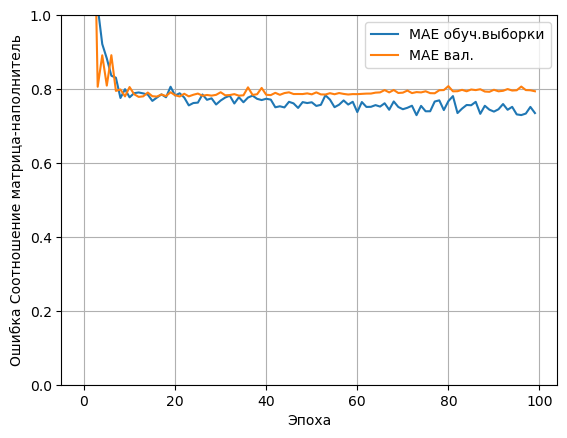

In [202]:
plot_loss(history_smn)

In [176]:
predict_smn = model_Seq_smn.predict(X_test_smn)

4/4 [==============================] - 0s 2ms/step


In [177]:
r2_score(y_test_smn, predict_smn)

-0.24387255530058938

In [ ]:
pip freeze